# Unraveling Vehicle Valuation at Crankshaft List

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The purpose for this project is to analyse and determine what factors that influence the price of a vehicle.  


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-sells-a-car?" data-toc-modified-id="What-sells-a-car?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What sells a car?</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Explore-initial-data" data-toc-modified-id="Explore-initial-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Explore initial data</a></span></li><li><span><a href="#Conclusions-and-further-steps" data-toc-modified-id="Conclusions-and-further-steps-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Conclusions and further steps</a></span></li></ul></li><li><span><a href="#Treat-missing-values-(if-any)" data-toc-modified-id="Treat-missing-values-(if-any)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Treat missing values (if any)</a></span></li><li><span><a href="#Fix-data-types" data-toc-modified-id="Fix-data-types-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fix data types</a></span></li><li><span><a href="#Enrich-data" data-toc-modified-id="Enrich-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Enrich data</a></span></li><li><span><a href="#Check-clean-data" data-toc-modified-id="Check-clean-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Check clean data</a></span></li><li><span><a href="#Study-core-parameters" data-toc-modified-id="Study-core-parameters-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Study core parameters</a></span></li><li><span><a href="#Study-and-treat-outliers" data-toc-modified-id="Study-and-treat-outliers-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Study and treat outliers</a></span></li><li><span><a href="#Study-core-parameters-without-outliers" data-toc-modified-id="Study-core-parameters-without-outliers-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Study core parameters without outliers</a></span></li><li><span><a href="#Ads-lifetime" data-toc-modified-id="Ads-lifetime-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Ads lifetime</a></span></li><li><span><a href="#Average-price-per-each-type-of-vehicle" data-toc-modified-id="Average-price-per-each-type-of-vehicle-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Average price per each type of vehicle</a></span></li><li><span><a href="#Price-factors" data-toc-modified-id="Price-factors-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Price factors</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></li></ul></div>

# Initialization

Load libraries that required for the project.


In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

### Load data

Load the project data and have a look at the general information.

In [2]:
# Load the data file into a DataFrame

data= pd.read_csv('datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

Understanding the fields and explore them to familiar with the data

In [3]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


General information from the sample:

- model_year, cylinders, odometer, paint_color, is_4wd columns has missing values
- is_4wd need to further investigation because have many missing values 
- date_posted columns in str

Columns with inappropriate data types:

- model_year change from float to int
- date_posted change from str to date 

Briefly describe the missing values across all columns:

- is_4wd need contain the most missing value
- the missing value probably the 0 that means False which the car is not 4wd

### Conclusions and further steps


In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Conclusion regarding the initial data:
    
- model vehicle influence the price of a vehicle
- the odometer influence the price of a vehicle
- the transmission type influence the price of a vehicle

Next step:

- Treat the missing values
- Change model year to int (after treat the missing values)
- Change data types date_posted to date

## Treat missing values (if any)

In [6]:
# Check the percentage missing value
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

The missing value from the data:

- model_year
- cylinders 
- odometer
- paint_color
- is_4wd 

Hypothesis to fill in the missing value

- Fill the is_4wd column by 0, that means the vehicle is not 4wd.
- Treat the missing values in cylinders columns based on majority for each model,
- Treat the missing values in model_year columns based on majority for each model and model_year.
- Treat the missing values in odometer based on conditon.
- Fill the paint color with 'unknown' because there are not logically depict a direct relationship paint_color with other columns 


In [7]:
# fill the missing values for is_4wd to 0
data['is_4wd'].fillna(0,inplace = True)
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [8]:
# Treat the missing values in cylinders columns based on majority for each model
# Group the model and cylinders and fill the missing values with mode 
f = lambda x: x.mode().iat[0] if x.notna().any() else np.nan
group_model = data.groupby('model')['cylinders'].transform(f)
data ['cylinders'] = data ['cylinders'].fillna(group_model)
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [9]:
# Treat the missing values in model_year columns based on majority for each model
# Check the model year value_counts for bmw x5 model for confirmation if it suitable used model dependence with model_year
bmw_data = data.query('model == "bmw x5"')
bmw_data.model_year.value_counts()

2012.0    40
2011.0    27
2010.0    24
2008.0    21
2004.0    20
2013.0    16
2007.0    15
2003.0    14
2006.0    14
2009.0    13
2015.0    11
2005.0    10
2001.0     7
2002.0     4
2017.0     3
2014.0     3
2016.0     2
2018.0     2
Name: model_year, dtype: int64

In [10]:
# group the model and model_year and fill the missing values in model columns with mode 
x = lambda x: x.mode().iat[0] if x.notna().any() else np.nan
group_model_year = data.groupby('model')['model_year'].transform(x)
data ['model_year'] = data ['model_year'].fillna(group_model_year)
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [11]:
# Fill in odometer and condition of a vehicle
group_cond_odo = data.groupby('condition')['odometer'].transform('median')
data ['odometer'] = data ['odometer'].fillna(group_cond_odo)
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


Conclusion:

- From the data, the condition is the best information related with odometer.
- Therefore, the aggregate median from condition and odometer will be used to fill in the missing values

In [12]:
# Because there are not logically depict a direct relationship paint_color with other columns 
# Therefore, to treat the missing value in paint_color
# Fill in the missing value with unknown
data ['paint_color'] = data ['paint_color'].fillna('unknown')
data ['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [13]:
# Check the missing value
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Conclusion:

- Missing value already been treat and be fill based on hypothesis.
- Next, fix the data types

## Fix data types

As the data is more or less complete now, then fix the data types.

In [14]:
# double check the data types using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [15]:
# Change date_posted into datetime
data ['date_posted'] = pd.to_datetime(data['date_posted'],format = '%Y-%m-%d')
data['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [16]:
# Change float to int 
data['model_year'] = data['model_year'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['odometer'] = data['odometer'].astype(int)
data['is_4wd'] = data['is_4wd'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 4.2+ MB


Conclusion:
- date_posted columns data type change to datetime which the correct data type 
- is_4wd converted to bool since it is the nature of 1 and 0
- odometer, cylinders, model_year should be in int type rather than float since these columns logically doesnt need decimal.

## Enrich data

Additional factors to be add in the data to make the analysis easier.

In [17]:
# Add datetime values for when the ad was placed
data['day_posted'] = data['date_posted'].dt.day_name()
data['day_posted'].value_counts()

Thursday     7510
Saturday     7392
Sunday       7356
Monday       7339
Friday       7334
Wednesday    7299
Tuesday      7295
Name: day_posted, dtype: int64

In [18]:
data['month_posted'] = data['date_posted'].dt.month_name()
data['month_posted'].value_counts()

October      4643
December     4564
March        4559
May          4503
August       4480
July         4471
January      4452
September    4452
November     4354
June         4216
February     4014
April        2817
Name: month_posted, dtype: int64

In [19]:
data['year_posted'] = data['date_posted'].dt.year
data['year_posted'].value_counts()

2018    35683
2019    15842
Name: year_posted, dtype: int64

From the date_posted, the information that can be extract are the day, the month, and the year. This information give more detail in date posted columns. 

In [20]:
# Add the vehicle's age when the ad was placed
data['vehicle_age'] = (data['year_posted'] - data['model_year'])+1
data['vehicle_age'].value_counts()

6     4008
5     3917
7     3853
8     3733
4     3503
      ... 
72       1
60       1
83       1
70       1
90       1
Name: vehicle_age, Length: 68, dtype: int64

When substract the model year, +1 need to be included. The +1 included because to include the first year or the start of the year. 

In [21]:
# Add the vehicle's average mileage per year
data['avg_mileage'] = (data['odometer'] / data['vehicle_age'])
data['avg_mileage'] = data['avg_mileage'].map('{:.0f}'.format)
data['avg_mileage'] = data['avg_mileage'].astype(int)
data['avg_mileage']

0        18125
1        14784
2        15714
3        10683
4        26968
         ...  
51520    14689
51521    10676
51522    12800
51523    23262
51524    25800
Name: avg_mileage, Length: 51525, dtype: int32

In [22]:
# Check if any NaN value in the columns
data['avg_mileage'].isna().sum()

0

Average mileage per can be find by dividing odometer and vehicle age. This information determine whether a vehicle gets used less than or more than usual. 

In [23]:
data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [24]:
dict_cond = {'new': 5,
             'like new': 4,
             'excellent': 3,
             'good': 2,
             'fair': 1,
             'salvage': 0}


data['condition'] = data['condition'].map(dict_cond)

In [25]:
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Check clean data

The data is ready for the analysis. Just take another quick look at it either it is helpful to use for the analysis.

In [26]:
# Check the duplicated data
data.duplicated().sum()

0

No duplicated data in the raw data. Next, check the summary information the DataFrame and print some sample to check the data in desire way.

In [27]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_posted    51525 non-null  object        
 14  month_posted  51525 non-null  object        
 15  year_posted   51525 non-null  int64 

In [28]:
# print a sample of data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,8,18125
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,6,14784
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,17,10683
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3,26968
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,5,11591
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,4,19803
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,Monday,January,2019,7,15639
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,Monday,July,2018,7,14882
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,Friday,February,2019,12,12266


The data look clean and ready to analysis

# EDA

## Study core parameters

The parameters:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

These listed parameters will be pay special attention on by using the histograms. Here, the outliers will affect the form and readability of the histograms.

In [29]:
# Overview general information for parameters 
data.describe()[['cylinders','price','vehicle_age','avg_mileage','condition']]

,cylinders,price,vehicle_age,avg_mileage,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,6.121494,12132.464920,9.436429,15700.548685,2.637535
std,1.657296,10040.803015,6.158509,12278.061158,0.712447
min,3.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,5000.000000,5.000000,9400.000000,2.000000
50%,6.000000,9000.000000,8.000000,13167.000000,3.000000
75%,8.000000,16839.000000,13.000000,18429.000000,3.000000
max,12.000000,375000.000000,111.000000,373200.000000,5.000000


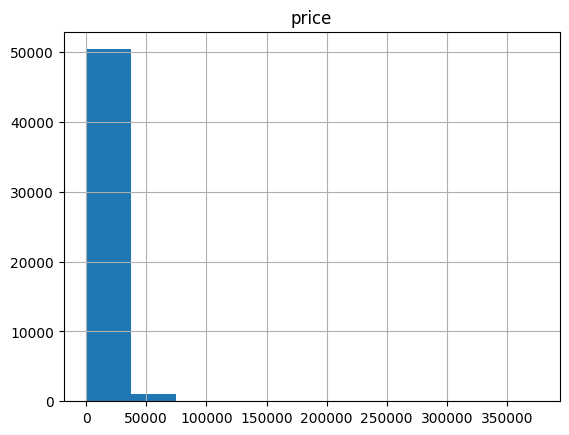

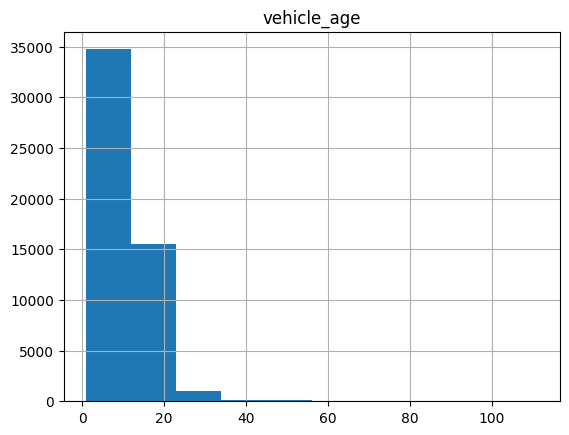

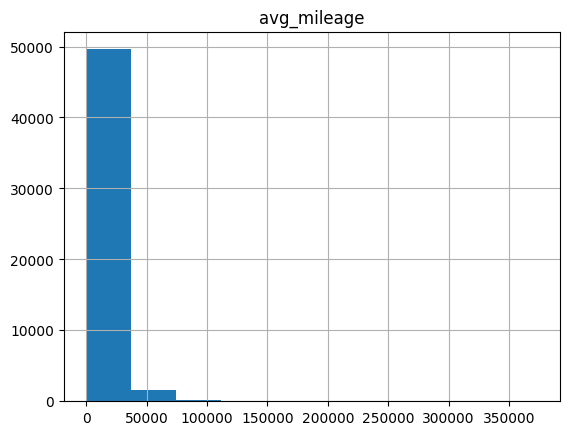

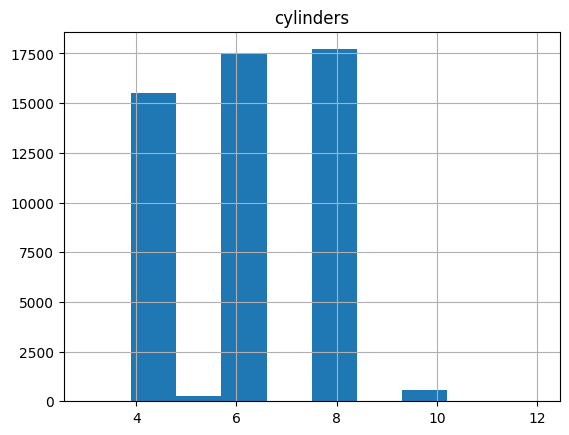

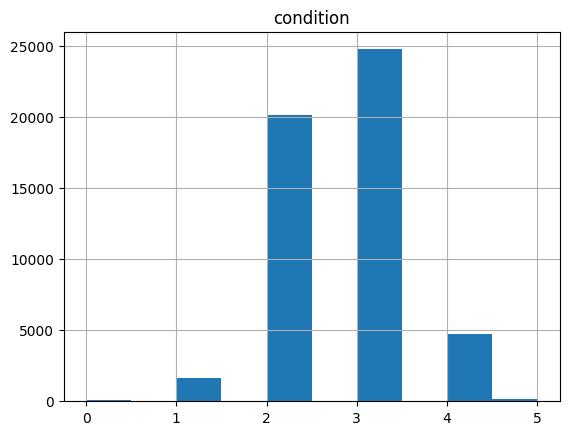

In [30]:
columns = ['price','vehicle_age','avg_mileage','cylinders','condition']

for column in columns:
    data.hist(column)

Conclusion:
- the outliers cause the difficulty to read the data price,vehicle_age and avg_mileage.
- from the histogram the data from price,vehicle_age and avg_mileage are right-skewed
- then the mean is typically GREATER THAN the median.

## Study and treat outliers

Given the results above, columns that contain outliers are price, vehicle_age and avg_mileage. Then, create a DataFrame without those outliers. The outliers can be identified by defining the lower/upper limits for normal range of values.

In [31]:
# Determine from histogram above, columns that contain outliers are price, vehicle_age and avg_mileage
# Create Dataframe based on outliers columns
outlier = data[['price','vehicle_age','avg_mileage']]
outlier

,price,vehicle_age,avg_mileage
0,9400,8,18125
1,25500,6,14784
2,5500,7,15714
3,1500,17,10683
4,14900,3,26968
...,...,...,...
51520,9249,6,14689
51521,2700,17,10676
51522,3950,10,12800
51523,7455,6,23262


In [32]:
# Determine the lower limits for outliers
Q1 = outlier.quantile(0.25)
Q1

price          5000.0
vehicle_age       5.0
avg_mileage    9400.0
Name: 0.25, dtype: float64

In [33]:
# Determine the upper limits for outliers
Q3 = outlier.quantile(0.75)
Q3

price          16839.0
vehicle_age       13.0
avg_mileage    18429.0
Name: 0.75, dtype: float64

In [34]:
# IQR scores
IQR = Q3-Q1
# Filtered data where outlier been remove
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,price,vehicle_age,avg_mileage
0,9400,8,18125
1,25500,6,14784
2,5500,7,15714
3,1500,17,10683
4,14900,3,26968
...,...,...,...
51520,9249,6,14689
51521,2700,17,10676
51522,3950,10,12800
51523,7455,6,23262


In [35]:
# Copy the index
index_list = list(data_filtered.index.values)

In [36]:
# Store data without outliers in a separate DataFrame
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,8,18125
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,6,14784
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,17,10683
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3,26968


New variable has stored the fitered data without outlier.Next, the filtered data will be used to create histogram.

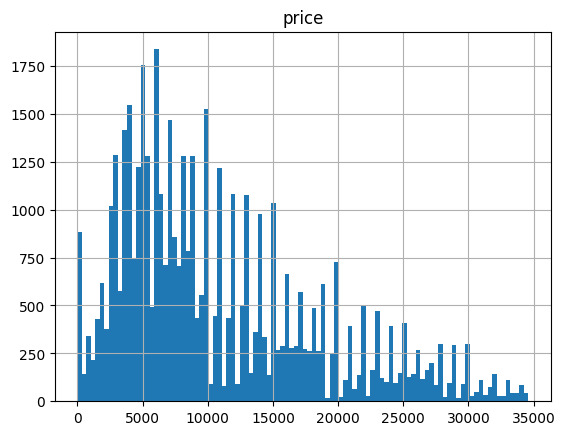

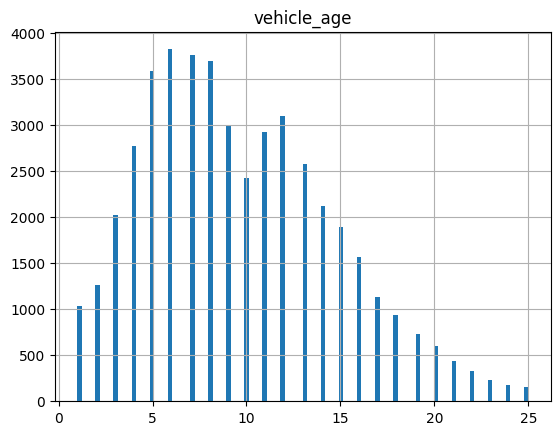

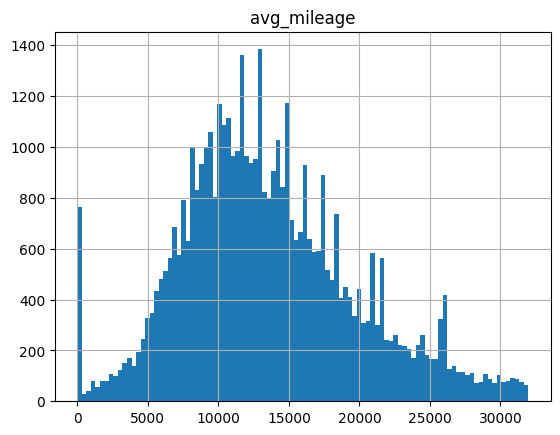

In [37]:
# create histogram with the filtered outlier 
filtered_outlier = data_filtered[['price','vehicle_age','avg_mileage']] 

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

Conclusion:
- Determine the lower limits and upper limit for outliers by defining the 25th and 75th percentile. Then, find interquartile range. Used this information to filter out the outlier. After removing the outliers, the graph looks more symmetrical compared with outliers and the data look more easily to observe the mean, median, and mode.


- From price histogram, the majority price disributed in range 0 - 10000. The maximum price is 35000. For range more than 10000, the count is below 1250 and decreasing when the price increase until 35000.


- From vehicle_age histogram, the majority age distribution in range 5-10. In range 20-25, the age was distibute the least from the rest. 


- from avg_mileage histogram, the highest distribution mileage is in range 10000-15000. Here, the majority of the vehicles mileage per year in this range. 

## Study core parameters without outliers

This section will use the filtered data to make new plots, then, compared with the earlier ones that included outliers.

[[<Axes: title={'center': 'price'}>]]
[[<Axes: title={'center': 'price'}>]]


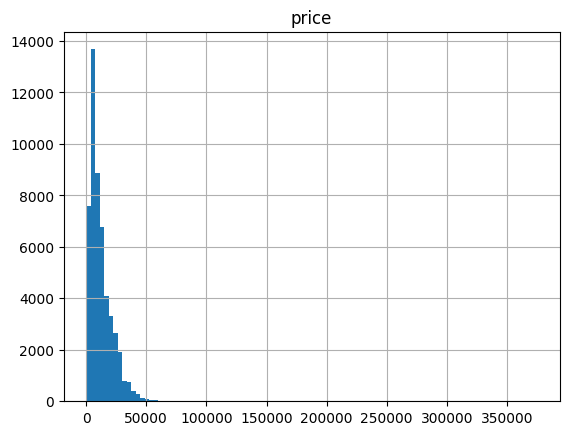

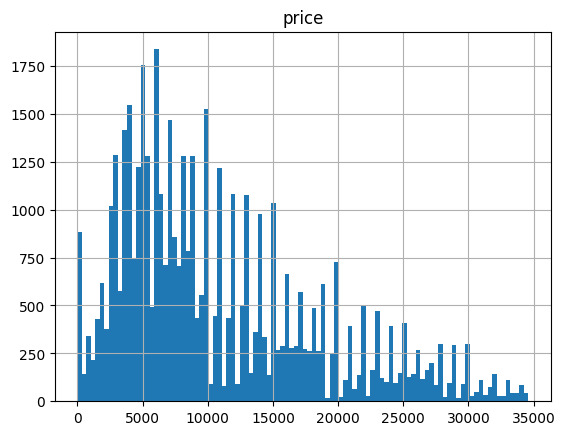

In [38]:
# Compared price with and without outliers (histogram)
print (data.hist('price', bins=100))
print (data_filtered.hist('price', bins=100))

Conclusion:
- The price outlier has been slice from max 350000 to 35000. The histograms are easy to understand and can instantly tell a lot about price data. The mean still higher than median, therefore it show right-skewed histogram.


- From the histogram whithout outlier, the majority price disributed in range 2500 - 10000. The maximum price is 35000. For range more than 10000, the count is below 1250 and decreasing when the price increase until 35000. Here, it show that the vehicle price average on this range (2500 - 10000). If more than the average means that the vehicle can be categorised expensive. 

[[<Axes: title={'center': 'vehicle_age'}>]]
[[<Axes: title={'center': 'vehicle_age'}>]]


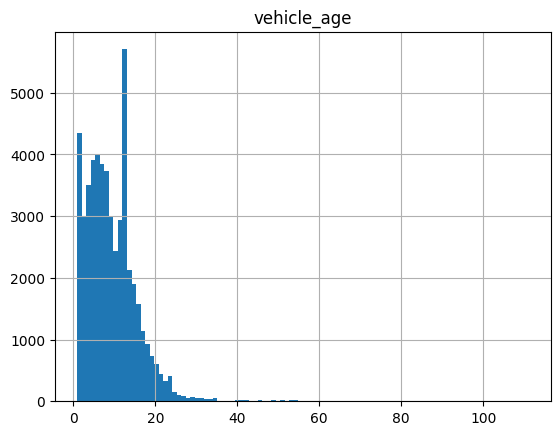

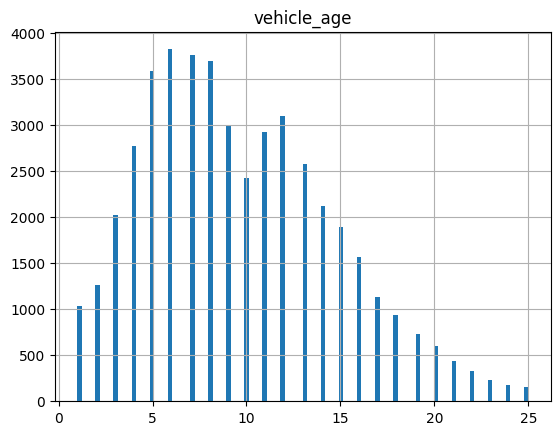

In [39]:
# Compared vehicle age with and without outliers (histogram)
print (data.hist('vehicle_age', bins=100))
print (data_filtered.hist('vehicle_age', bins=100))

Conclusion:
- The vehicle age outlier has been slice from max 100 to 25. The mean still higher than median, therefore it show right-skewed histogram.


- From the histogram, the vehicle age average around 5 to 10 years old. This vehicle in acceptable range of age. If age is more than the range, thevehicel can be considered old and if less, the vehicle considered new for used car available.

[[<Axes: title={'center': 'avg_mileage'}>]]
[[<Axes: title={'center': 'avg_mileage'}>]]


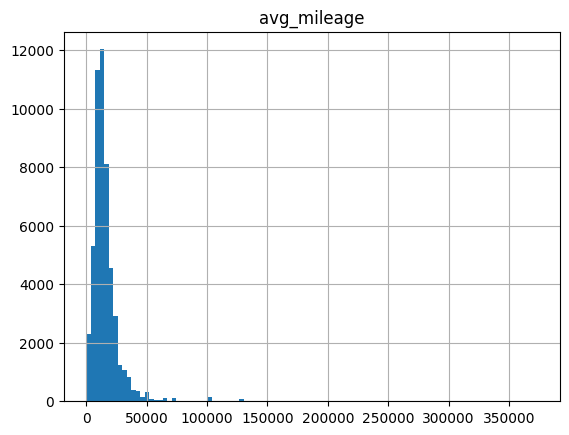

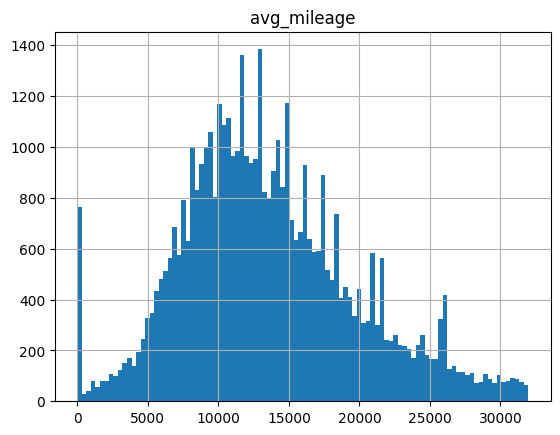

In [40]:
# Compared average mileage with and without outliers (histogram)
print (data.hist('avg_mileage', bins=100))
print (data_filtered.hist('avg_mileage', bins=100))

Conclusion:
- The average mileage outlier has been slice from max 350000 to 30000. The mean still a little bit higher than median. The graph almost symmetrical distribution.


- From the graph, the average mileage around 10000 to 15000 can be considered vehicle that been used moderately. If the range is below than the average, it means the vehicle is rarely or sometimes been used. If more than that, it means that the vehicle is heavily used by the past owner. 

## Ads lifetime

This section will study how many days advertisements were displayed (`days_listed`). Then, the mean and median will be calculate. Typical lifetime of an ads will be describe. Lastly, determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [41]:
# Calculate the mean and median days_listed
mean_days = data_filtered['days_listed'].mean()
median_days = data_filtered['days_listed'].median()
print(mean_days)
print(median_days)

39.55696722197014
33.0


In [42]:
# General information in days_listed
data_filtered['days_listed'].describe()

count    46281.000000
mean        39.556967
std         28.203132
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

array([[<Axes: title={'center': 'days_listed'}>]], dtype=object)

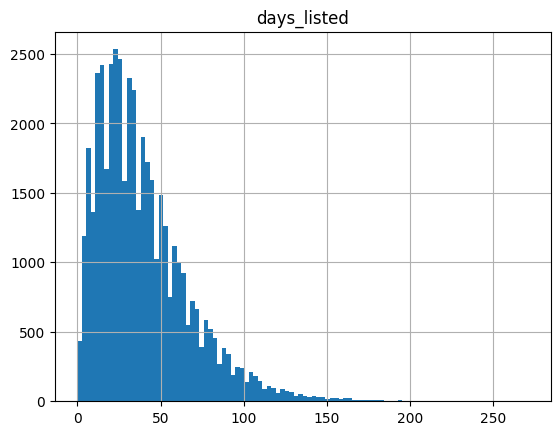

In [43]:
# Create the histogram
data_filtered.hist('days_listed', bins=100)

Conclusion:
 - The mean and median for days listed are 39.5 and 33.0. The histogram show right skewness due to mean higher than median. Minimum ads was removed at day 0 while the maximum ads was removed at days 271. 271 days for ads is very abnormally a long time for ads. 
 
 
 - From the graph, the 25th to 50th percentile is and average days listed for ads which around 19 to 33 days. If the days is less than the 25th percentile, it means that the vehicle is high demand or the days is abnormlly short for some unknown reason. Plus, if the days is more that 50th percentile, it means the car is low demand or the days is abnormlly long for some unknown reason.

## Average price per each type of vehicle

This section, the number of ads and the average price for each type of vehicle will be analyze. Plot a graph showing the dependence of the number of ads on the vehicle type. Then, select the two types with the greatest number of ads.

In [44]:
# Create a variable with type and average price 
avg_price = data_filtered.pivot_table(index='type', values='price', aggfunc='mean')
avg_price.sort_values(ascending=False ,by='price')

,price
type,
bus,17445.913043
truck,14600.610046
pickup,14427.891168
offroad,14120.927778
coupe,13010.291347
convertible,12714.377907
SUV,10197.180371
other,10037.229730
wagon,8749.005427


In [45]:
# Create a variable with type and number of ads 
ads = data_filtered.pivot_table(index='type', values='days_listed', aggfunc='count')
ads = ads.sort_values(ascending=False, by ='days_listed' )
ads = ads.reset_index()
ads

,type,days_listed
0,SUV,11493
1,sedan,11371
2,truck,10591
3,pickup,6046
4,coupe,1953
5,wagon,1474
6,mini-van,1073
7,hatchback,975
8,van,536
9,convertible,344


<Axes: xlabel='type'>

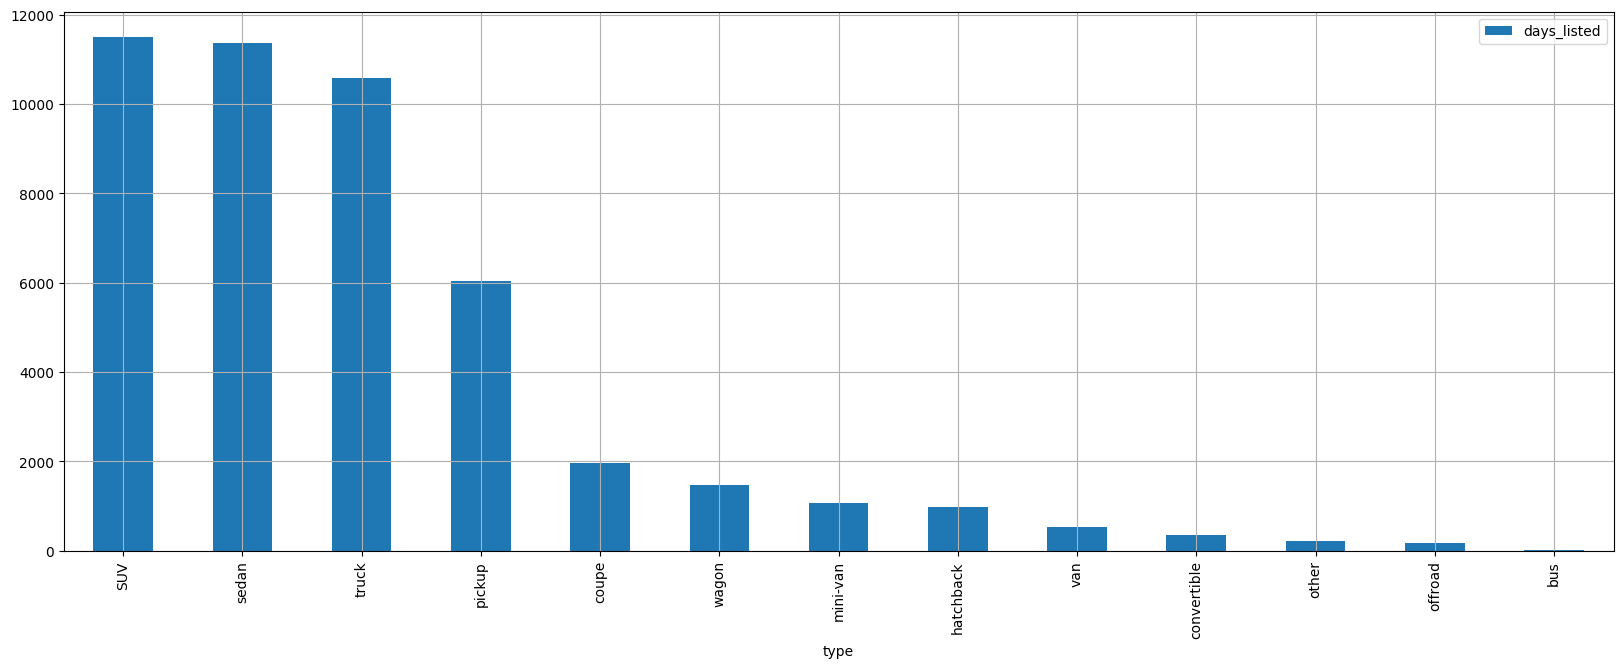

In [46]:
# Plot the type and number of ads 
ads.plot(grid=True, figsize=(20, 7), kind = 'bar', x='type',y='days_listed')

Conclusion:

- The average price for each type show the bus was the highest price and the second type was truck. The reason maybe because bus have a bigger body and have many components needed compared to the other types.  	

- Two types with the greatest number of ads are:
    - SUV  
    - sedan
- These 2 types have the most available option in used car inventory.

## Price factors

This section will analyze factors that impact the price most based on popular types from the previous stage . 

Price depends on:
- age
- mileage
- condition
- transmission type
- color

For categorical variables (transmission type and color), plot box-and-whisker charts been used, and scatterplots for the rest. When analyzing categorical variables, the categories must have at least 50 ads to be valid for analysis. Correlation matrix and correlation plots will be used to assess the strength and direction of the linear relationships between pairs of variables.

In [47]:
# Filtered 2 popular type
suv = data_filtered.query('type == "SUV"')
sedan = data_filtered.query('type == "sedan"')

Text(0.5, 1.0, 'sedan')

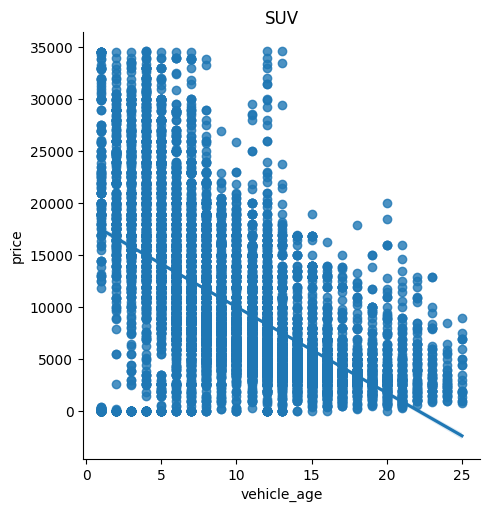

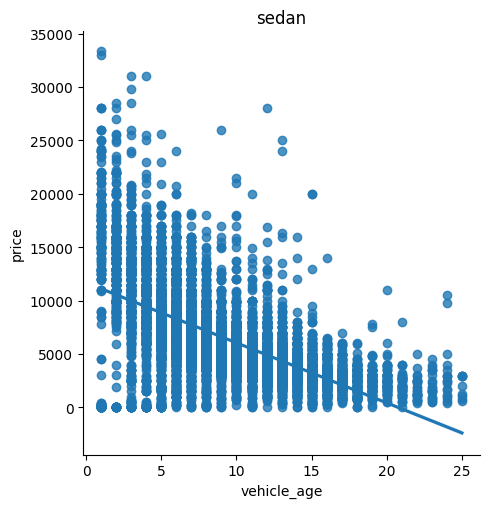

In [48]:
#Plot graph
sns.lmplot(x="vehicle_age", y="price", data=suv)
plt.title('SUV')
sns.lmplot(x="vehicle_age", y="price", data=sedan)
plt.title('sedan')

In [49]:
# Find correlation
age_suv = suv[['vehicle_age','price']]
corr_suv = age_suv.corr()
age_sedan = sedan[['vehicle_age','price']]
corr_sedan = age_sedan.corr()

In [50]:
round(corr_suv,3)

,vehicle_age,price
vehicle_age,1.000,-0.577
price,-0.577,1.000


In [51]:
round(corr_sedan,3)

,vehicle_age,price
vehicle_age,1.000,-0.613
price,-0.613,1.000


Conclusion : 
 - Vehicle age for both type influenced the price value for vehicle. Increasing the age for the vehicle will reduce the price. The correlation coefficient is negative means the age decreases when the price increases. Here, show that the price is decrease due to from the age can be assume the vehicle still in good condition and stil have value.

Text(0.5, 1.0, 'sedan')

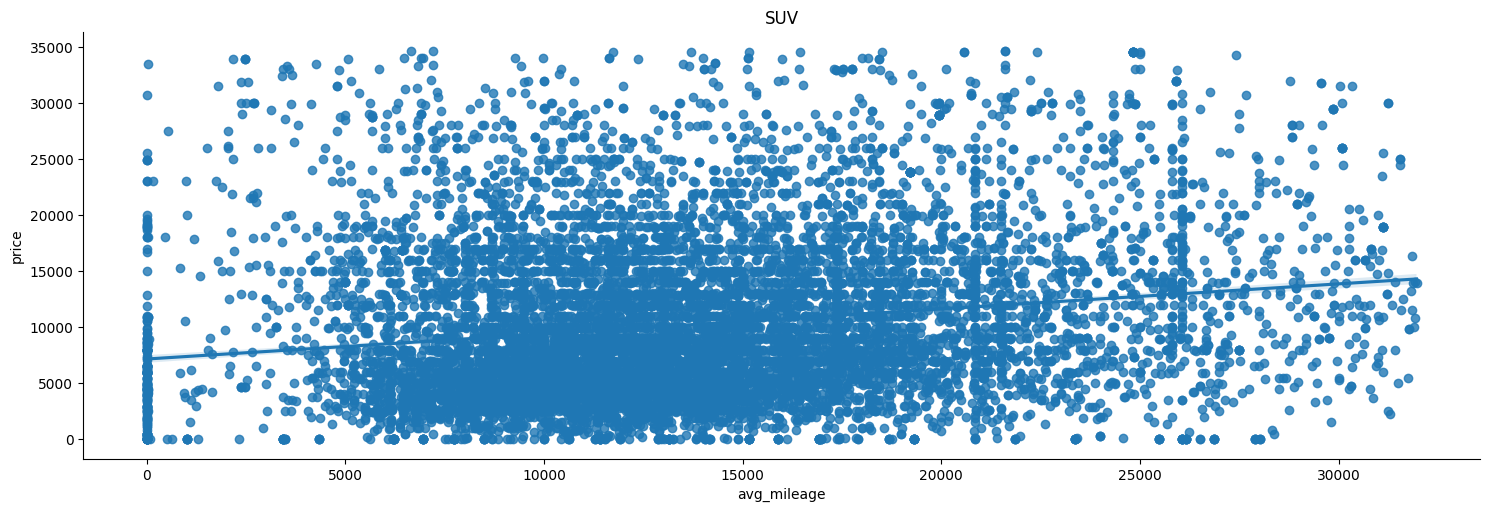

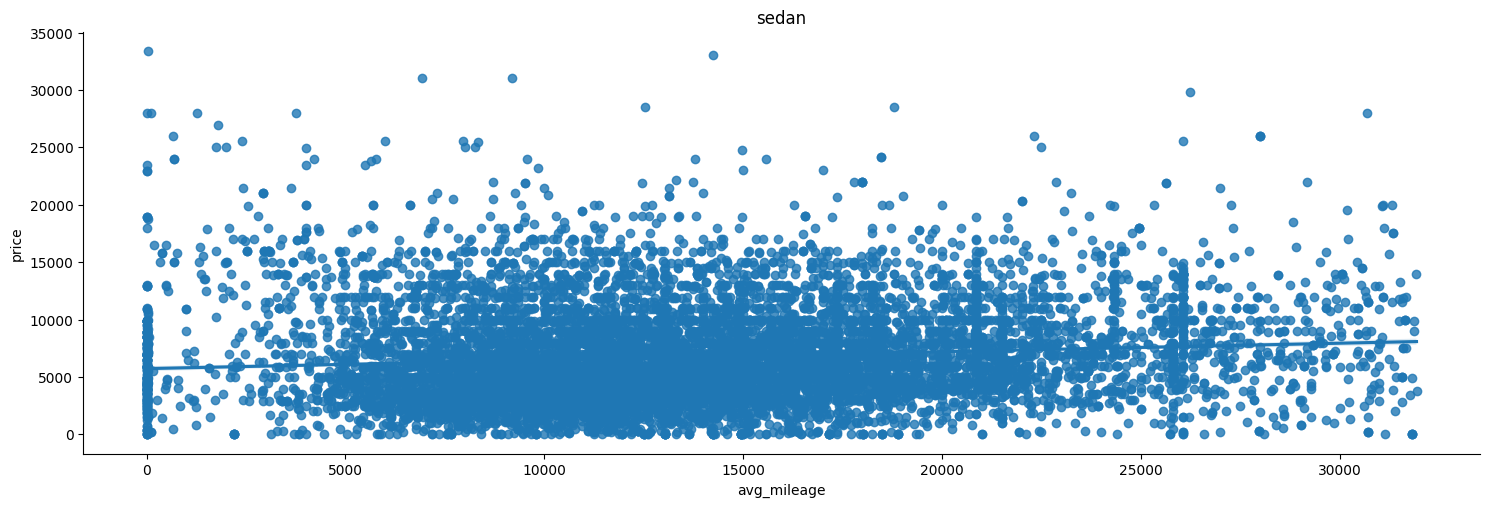

In [52]:
# Average price-mileage plot
sns.lmplot(x="avg_mileage", y="price", data=suv, height = 5, aspect =3)
plt.title('SUV')
sns.lmplot(x="avg_mileage", y="price", data=sedan, height = 5, aspect =3)
plt.title('sedan')

In [53]:
# Find correlation
mileage_suv= suv[['avg_mileage','price']]
mileage_suv_corr = mileage_suv.corr()
mileage_sedan = sedan[['avg_mileage','price']]
mileage_sedan_corr = mileage_sedan.corr()

In [54]:
round(mileage_suv_corr,3)

,avg_mileage,price
avg_mileage,1.000,0.189
price,0.189,1.000


In [55]:
round(mileage_sedan_corr,3)

,avg_mileage,price
avg_mileage,1.00,0.11
price,0.11,1.00


Conclusion: 

- Mileage give a small influenced the price value for vehicle. Increasing the mileage for the vehicle will increase the price. The correlation coefficient is positive means the mileage increases when the price increases. 


- Mileage for both type influenced the price value for vehicle. Increasing the mileage for the vehicle will increase the price. The correlation coefficient is positive means the mileage increases when the price increases. Here, show that the price still a little bit increase maybe because the vehicle shown that it can still be drive in a long distance.   

In [56]:
# Filter out category in condition with less than 50 instances
suv.condition.value_counts()

3    6038
2    4090
4    1026
1     304
0      18
5      17
Name: condition, dtype: int64

In [57]:
sedan.condition.value_counts()

3    5729
2    4079
4    1196
1     284
5      43
0      40
Name: condition, dtype: int64

For both suv and sedan type, the condition for 0 and 5 is below 50. Therefore, the parameters won't be valid for analysis.

Text(0.5, 1.0, 'SUV')

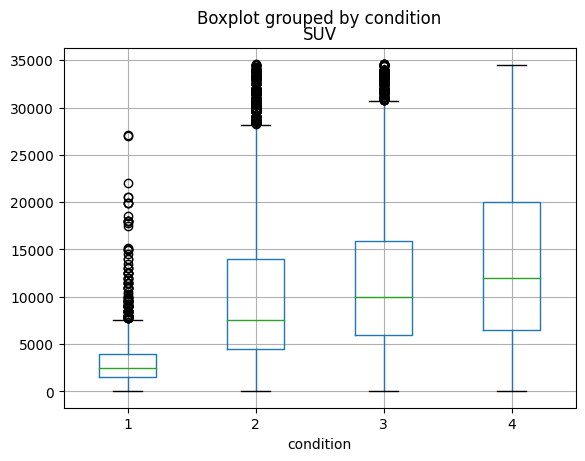

In [58]:
# Price-condition boxplot suv
filter_cond_suv = data_filtered.query('condition == [1,2,3,4]')
filter_cond_suv.boxplot(by ='condition', column ='price', grid = True)
plt.title('SUV')

Text(0.5, 1.0, 'sedan')

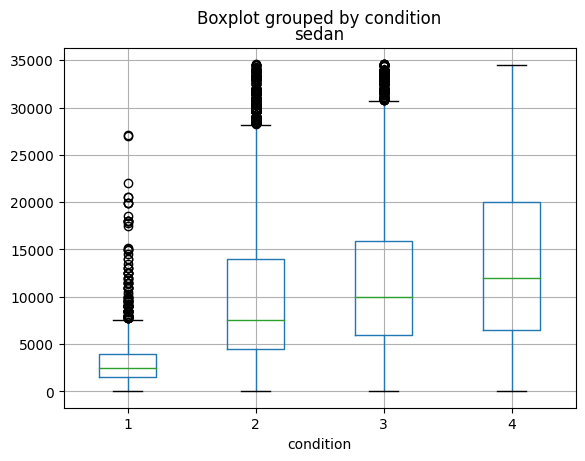

In [59]:
# Price-condition boxplot sedan
filter_cond_sedan = data_filtered.query('condition == [1,2,3,4]')
filter_cond_sedan.boxplot(by ='condition', column ='price', grid = True)
plt.title('sedan')

Conclusion:
- From the both graph show that the condition influenced the price value for vehicle. Better the condition for the vehicle will increase the price. As an example, vehicles with torn leather seats, electronic equipment that doesn’t work, scratches or dents, or other similar issues will not be highly sought after and thus will give negative impact to their price. 

In [60]:
# Filter out category in transmission with less than 50 instances
suv.transmission.value_counts()

automatic    10887
manual         459
other          147
Name: transmission, dtype: int64

In [61]:
sedan.transmission.value_counts()

automatic    10690
manual         565
other          116
Name: transmission, dtype: int64

For both suv and sedan type, the transmission show all the data above 50. Therefore, no ned to filter out the data.

<Axes: title={'center': 'price'}, xlabel='transmission'>

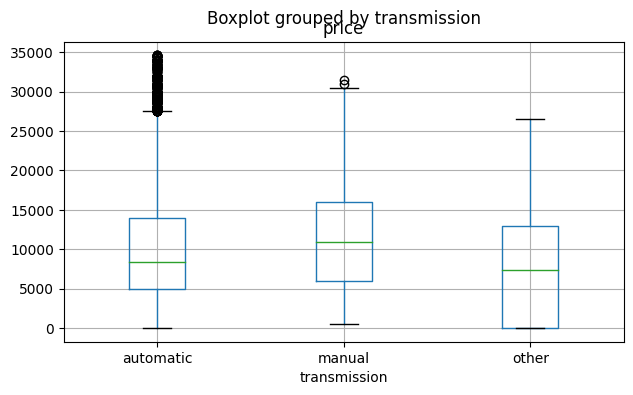

In [62]:
# Price-transmission boxplot
suv.boxplot(by ='transmission', column =['price'],figsize=(7,4), grid = True)

<Axes: title={'center': 'price'}, xlabel='transmission'>

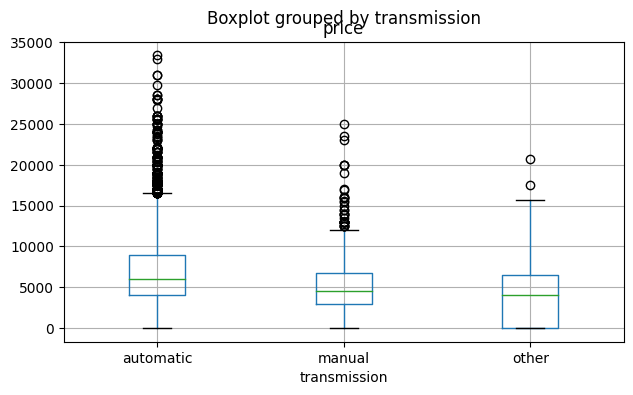

In [63]:
sedan.boxplot(by ='transmission', column =['price'],figsize=(7,4), grid = True)

Conclusion:

- From the suv graph, the manual price average is the highest while in the sedan graph show the automatic is the highest. Both show the different result for the highest price. The reason possibility because the transmission type factor are related based on the type vehicle. The different type vehicles have its highest price for the transmission. 

In [64]:
# Filter out category in paint color with less than 50 instances
suv.paint_color.value_counts()

unknown    2057
black      2015
white      1787
silver     1477
grey       1096
blue        975
red         853
green       424
brown       358
custom      294
orange       77
yellow       41
purple       39
Name: paint_color, dtype: int64

In [65]:
sedan.paint_color.value_counts()

unknown    2053
silver     1918
black      1647
grey       1516
white      1393
blue       1168
red         903
custom      273
brown       248
green       196
purple       26
yellow       21
orange        9
Name: paint_color, dtype: int64

For suv type, the yellow and purple color will be not chosen for the analysis. For the sedan type, the purple,yellow,and orange will be neglected for the analysis.

<Axes: title={'center': 'price'}, xlabel='paint_color'>

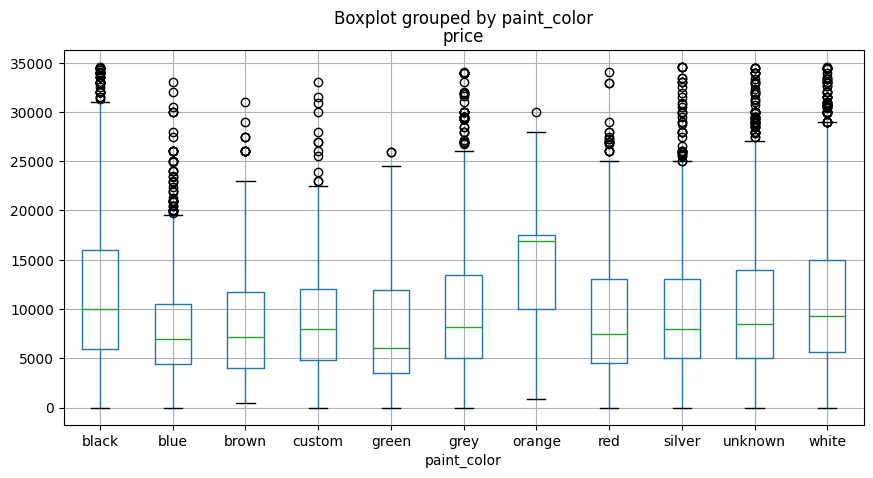

In [66]:
# Price-paint_color boxplot
suv_color_filtered = suv.query('paint_color !=["yellow","purple"]')
suv_color_filtered.boxplot(by ='paint_color', column ='price',figsize=(10,5), grid = True)

<Axes: title={'center': 'price'}, xlabel='paint_color'>

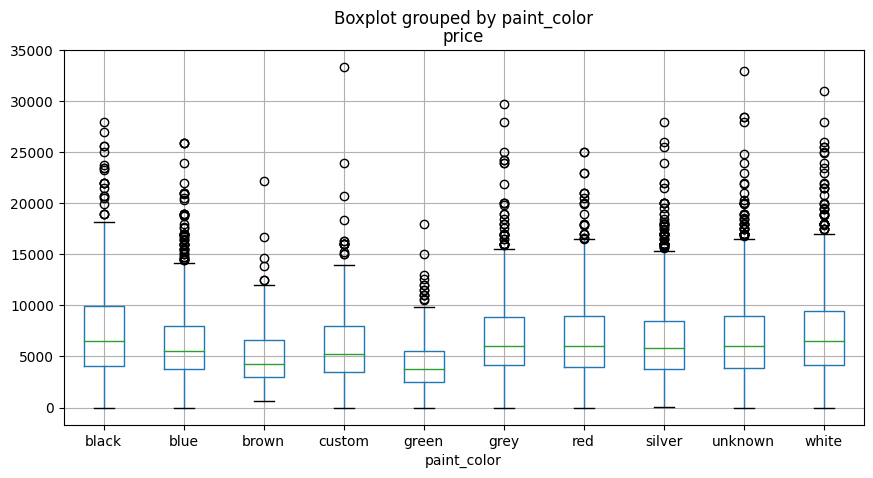

In [67]:
# Price-paint_color boxplot
sedan_color_filtered = sedan.query('paint_color !=["yellow","purple","orange"]')
sedan_color_filtered.boxplot(by ='paint_color', column ='price',figsize=(10,5), grid = True)

Conclusion:
- From both graph, paint color was one of the factor for price.
- Its can be prove by the orange color was the highest average price for suv type while black and white were the highest average price for sedan type. 
- In suv type, only orange color has pass 15000 price while other stll in range 5000-10000 average.
- Orange color maybe the rare or unlimited color, therefore, the price is higher than the normal color. 
- In sedan type, eventhough the black and white slightly higher average than others, these 2 color still in range 5000-10000, same range for other color except brown and grey.
- Therefore, brown and grey color is unwanted color that cause the price for the vehicle lower than the rest. 

# General conclusion

This project is to study data collected over the last few years and determine which factors influence the price of a vehicle. At the beginning, after loading the data and all the libraries needed, sample data and general summary have been print to be analysed. Check the abnormally in the data such as missing values and data types. 

Fill the missing values by compared it with other columns(if related):-
- is_4wd columns missing value can be fill with 0 with means False or True
- cylinders columns missing value can be fill based on majority for each model
- model_year columns missing value can be fill based on majority for each model
- condition columns were used to fill in the missing values in odometer columns
- paint color column fill with 'unknown' because there are not logically depict a direct relationship paint_color with other columns  

Change data type:-
- date_posted columns into datetime 
- model_year,cylinders,odometer and columns data type float to int
- is_4wd data type change to bool

Create new columns:- 
- Add datetime values for when the ad was placed day, month, year
- Add the vehicle's age when the ad was placed
- Add the vehicle's average mileage per year
- Replace the condition values with something that can be manipulated more easily

Check duplicated data and drop it

Check the outliers:-
- Parameter outliers: Price, Vehicle's age, Mileage, Cylinders, and Condition
- From the histogram the data from price,vehicle_age and avg_mileage are right-skewed

Remove the outliers:- 
- Determine the lower and upper limits for outliers and store in a separate DataFrame
- Do comparison by using histogram from data that contain outliers and does not contain outliers
- The comparison show the histogram without outliers are easily to investigate the mean, median, mode in the columns data

Study the price factor:-
- Factor that influenced the price : age, mileage, condition, transmission type, and color
- Age and mileage use the scatterplot method while the rest used boxplot for investigation 

Result:-

Vehicle age

- Vehicle age influenced the price value for vehicle. It means that lower vehicle age can use longer duration.  Therefore, the price were valued based on the life expectancy for the vehicle.

Average Mileage

- Mileage give a small influenced the price value for vehicle. The correlation coefficient is positive means the mileage increases when the price increase. However, the correlation is small that it looks like not much affected the price vehicle. Therefore, mileage does not affected the price. 

Vehicle condition

- Condition influenced the price value for vehicle. Better the condition for the vehicle will increase the price. Vehicle in good condition will be highly sought after and thus will give positive impact to their price. 

Transmission type

- Transmission type influenced the price value for vehicle. However, the price for the transmision type is different depend on the vehicle type. The reason maybe the highly wanted transmission type for different vehicle type is different based on the buyer preferences. 

Vehicle color

- Color for vehicle influenced the price value for vehicle. The rare or unlimited color has slightly higher price compare with normal color. However, the unwanted or unpopular color such as green and grey in sedan type is not the color preferences for buyers, therefore, the price need to be drop lower than average.   